# Regressão 01 - tarefa 02 - transformações em X e Y

In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import load_dataset
import statsmodels.formula.api as smf

%matplotlib inline
plt.rc('figure', figsize=(6, 4))

In [106]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

<Axes: xlabel='net_bill', ylabel='tip_pct'>

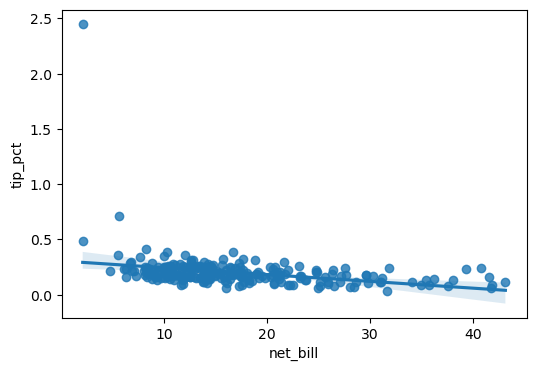

In [107]:
# Scatterplot - viewing data
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips)

<Axes: xlabel='net_bill', ylabel='tip_pct'>

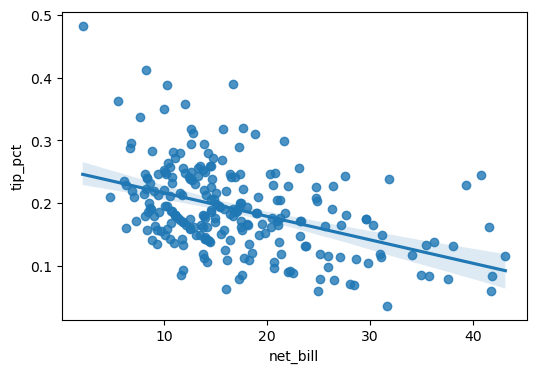

In [108]:
# Scatterplot - outlier correction (tips1)
tips1 = tips[tips['tip_pct']<.5]
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips1)

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     56.10
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           1.31e-12
Time:                        17:32:20   Log-Likelihood:                 331.48
No. Observations:                 242   AIC:                            -659.0
Df Residuals:                     240   BIC:                            -652.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2538      0.009     27.252      0.0

C:\Users\Guilherme Rhein\AppData\Local\Temp\ipykernel_8316\2273072185.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tips1.loc[:, 'res'] = reg.resid


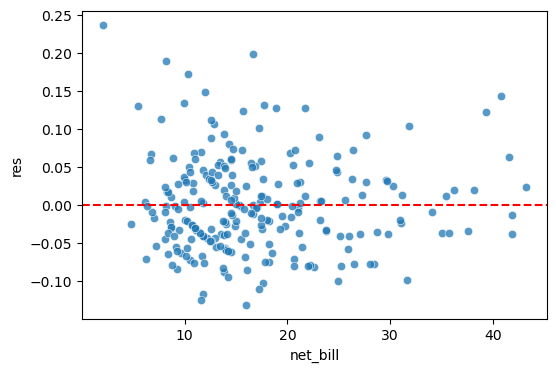

In [109]:
reg = smf.ols('tip_pct ~ net_bill', data = tips1).fit()
print(reg.summary())
tips1.loc[:, 'res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips1, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

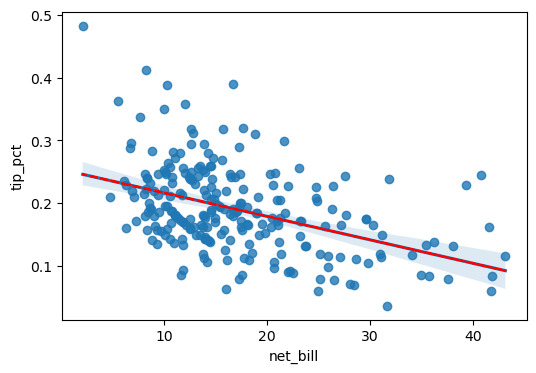

In [110]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips1)
plt.plot(tips1['net_bill'], reg.fittedvalues, 'r,--')

### 2. Ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     68.11
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           1.03e-14
Time:                        17:32:20   Log-Likelihood:                 336.29
No. Observations:                 242   AIC:                            -668.6
Df Residuals:                     240   BIC:                            -661.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3818      0.023  

C:\Users\Guilherme Rhein\AppData\Local\Temp\ipykernel_8316\2491767751.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tips1['res'] = reg.resid


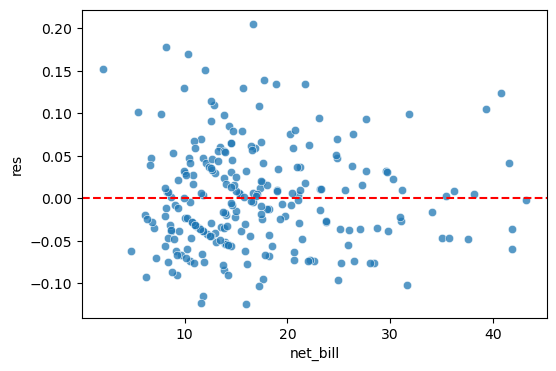

In [111]:
reg = smf.ols('tip_pct ~ np.log(net_bill)', data = tips1).fit()
print(reg.summary())
tips1['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips1, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

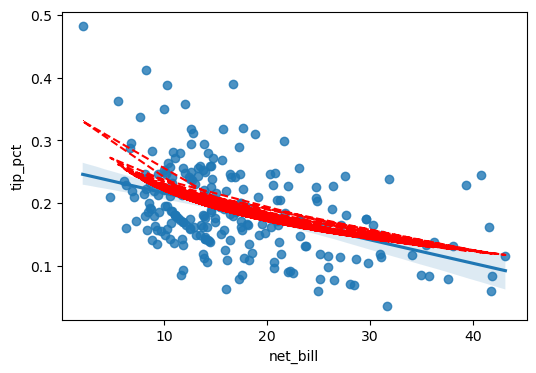

In [112]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips1)
plt.plot(tips1['net_bill'], reg.fittedvalues, 'r,--')

###  3. Ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     43.61
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           2.56e-10
Time:                        17:32:21   Log-Likelihood:                 326.27
No. Observations:                 242   AIC:                            -648.5
Df Residuals:                     240   BIC:                            -641.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.21

C:\Users\Guilherme Rhein\AppData\Local\Temp\ipykernel_8316\1264016059.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tips1['res'] = reg.resid


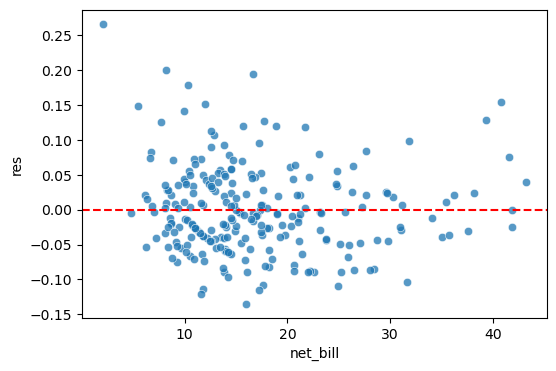

In [113]:
reg = smf.ols('tip_pct ~ np.power(net_bill,2)', data = tips1).fit()
print(reg.summary())
tips1['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips1, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

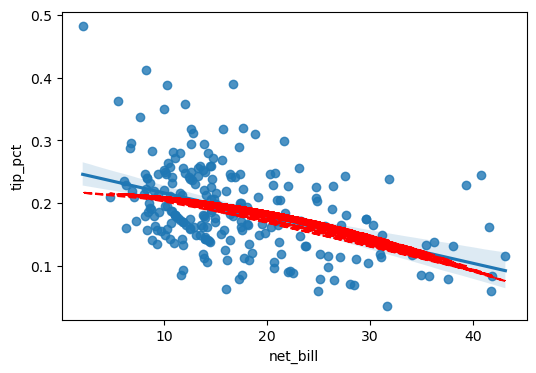

In [114]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips1)
plt.plot(tips1['net_bill'], reg.fittedvalues, 'r,--')

###  4. Ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     69.62
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           5.70e-15
Time:                        17:32:22   Log-Likelihood:                -81.349
No. Observations:                 242   AIC:                             166.7
Df Residuals:                     240   BIC:                             173.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3383      0.051    -26.095      0.0

C:\Users\Guilherme Rhein\AppData\Local\Temp\ipykernel_8316\2890314661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tips1['res'] = reg.resid


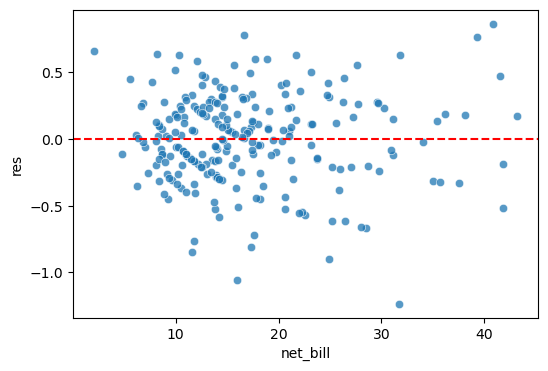

In [115]:
reg = smf.ols('np.log(tip_pct) ~ net_bill', data = tips1).fit()
print(reg.summary())
tips1['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips1, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

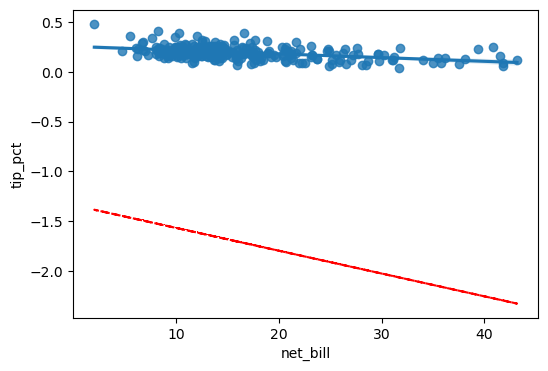

In [116]:
# R² from log(y)
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips1)
plt.plot(tips1['net_bill'], reg.fittedvalues, 'r,--')

In [117]:
# True R²:

tips1['pred_y'] = np.exp(reg.fittedvalues)

tips1[['pred_y', 'tip_pct']].corr().iloc[0,1]**2

C:\Users\Guilherme Rhein\AppData\Local\Temp\ipykernel_8316\3603488247.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tips1['pred_y'] = np.exp(reg.fittedvalues)


0.20051484016183768

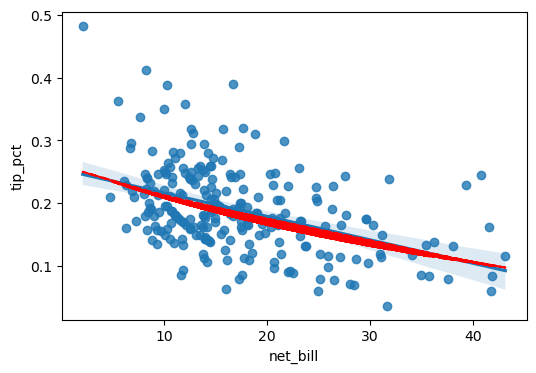

In [118]:
# True R² Plot
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips1)
plt.plot(tips1['net_bill'], tips1['pred_y'], 'r,--')

###  5. Ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     71.57
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           2.65e-15
Time:                        17:32:23   Log-Likelihood:                -80.588
No. Observations:                 242   AIC:                             165.2
Df Residuals:                     240   BIC:                             172.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.6285      0.131  

C:\Users\Guilherme Rhein\AppData\Local\Temp\ipykernel_8316\474735345.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tips1['res'] = reg.resid


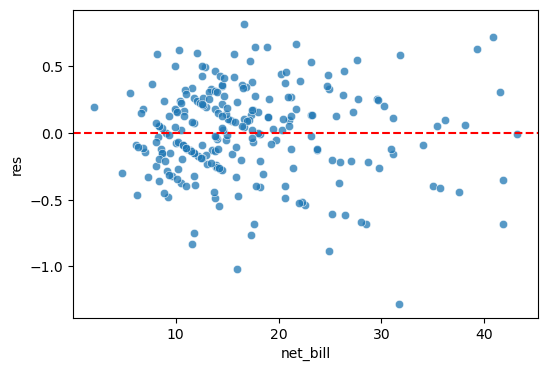

In [119]:
reg = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data = tips1).fit()
print(reg.summary())
tips1['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips1, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

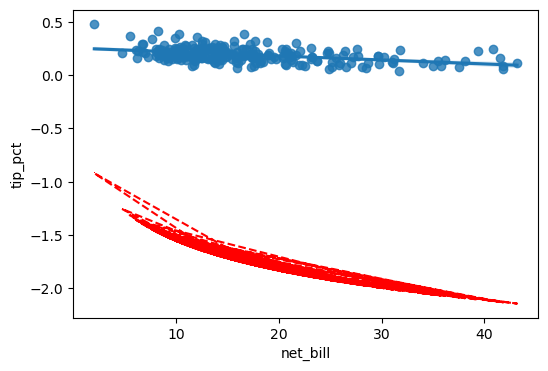

In [120]:
# R² from log(y)
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips1)
plt.plot(tips1['net_bill'], reg.fittedvalues, 'r,--')

In [121]:
# True R²:

tips1['pred_y'] = np.exp(reg.fittedvalues)

tips1[['pred_y', 'tip_pct']].corr().iloc[0,1]**2

C:\Users\Guilherme Rhein\AppData\Local\Temp\ipykernel_8316\3603488247.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tips1['pred_y'] = np.exp(reg.fittedvalues)


0.2291433651702267

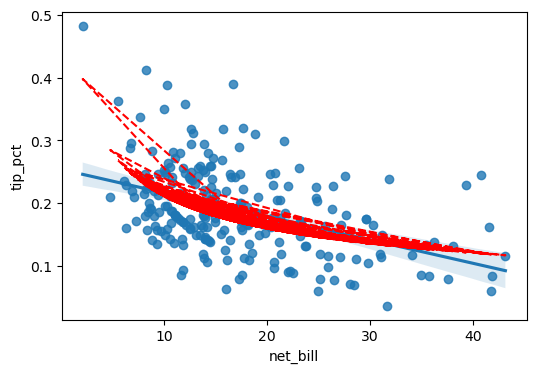

In [122]:
# True R² Plot
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips1)
plt.plot(tips1['net_bill'], tips1['pred_y'], 'r,--')

###  6. Qual modelo resultou no melhor ajuste?

- No 5° exercício em que houve um ajuste no modelo utilizando o log em ambas as variáveis X e Y. Obtivemos o R² de 22.9%, sendo o mais alto dos ajustes.<br><br>

- In the 5th exercise, when adjusting the model using the logarithm in both X and Y variables, we obtained an R² of 22.9%, which was the highest among the adjustments.